# S16 T02: Tasca de web scraping

## Nivell 1
### Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.



In [17]:
import pandas as pd
import numpy as np 
import selenium
import requests
from bs4 import BeautifulSoup
import re
from IPython.display import Image
from collections import defaultdict
from selenium.webdriver import Chrome 
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import seaborn as sns
import scrapy






**Beautiful soup**


EL procediment a seguir  serà: 
- fer una request a la url base
- parsejar el contingut amb beautifulsoup  a la variable soup
- amb la funció find_ buscare  tots els links que tinguin  el tag a
- concateno la url base amb la especifica
- faig una nova request amb la nova url i faig el mateix procediment exepte que ara buscare la variable table que tingui l'atribut TblPort 
- iterare sobre  la cerca on contindrà el llistat d'empreses. Per una banda itero en busca  dels labels apartir del tag th i per altre,  itero en per on hi hagui el tag td que es on esta la informació 
- finalment transformo la data a un dataframe  i la guardo a un csv

    

In [18]:
URL = "https://www.bolsamadrid.es"
page = requests.get(URL)

In [19]:
soup = BeautifulSoup(page.content, "html.parser")

In [20]:

for link in soup.find_all("a",string='Lista de Empresas'):
    link=link.get('href')

In [21]:
link

'/esp/aspx/Empresas/Empresas.aspx'

In [22]:
new_url=URL+link


In [23]:
new_url

'https://www.bolsamadrid.es/esp/aspx/Empresas/Empresas.aspx'

In [24]:
empresas= requests.get(new_url)

In [25]:
soup_empresas = BeautifulSoup(empresas.content,"html.parser")

In [26]:
taula = soup_empresas.find('table',attrs={'class':'TblPort'})

In [27]:
labels=[]

for element in taula.find_all("th"):    
    labels.append(element.get_text())
    
print(labels)
    

['Nombre', 'Sector - Subsector', 'Mercado', 'Índices']


In [28]:
results = []
for element in taula.find_all("td"):
    results.append(element.text)


In [29]:
data={}
for i in range(4):
    data[labels[i]]=results[i::4]

In [30]:
df = pd.DataFrame(data)

In [31]:
df

,Nombre,Sector - Subsector,Mercado,Índices
0,"ABENGOA, S.A.","Mat.Basicos, Industria y Construcción - Ingeni...",Mercado Continuo,
1,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción - Constr...",Mercado Continuo,IBEX 35®
2,"ACERINOX, S.A.","Mat.Basicos, Industria y Construcción - Minera...",Mercado Continuo,"IBEX 35®, IBEX TOP Dividendo®"
3,"ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A","Mat.Basicos, Industria y Construcción - Constr...",Mercado Continuo,"IBEX 35®, IBEX TOP Dividendo®"
4,"ADOLFO DOMINGUEZ, S.A.","Bienes de Consumo - Textil, Vestido y Calzado",Mercado Continuo,
5,"AEDAS HOMES, S.A.",Servicios Inmobiliarios - Inmobiliarias y Otros,Mercado Continuo,
6,"AENA, S.M.E., S.A.",Servicios de Consumo - Transporte y Distribución,Mercado Continuo,IBEX 35®
7,AIRBUS SE,"Mat.Basicos, Industria y Construcción - Aerosp...",Mercado Continuo,
8,AIRTIFICIAL INTELLIGENCE STRUCTURES S.A.,"Mat.Basicos, Industria y Construcción - Ingeni...",Mercado Continuo,
9,"ALANTRA PARTNERS, S.A.",Servicios Financieros - Cartera y Holding,Mercado Continuo,


In [32]:
df.to_csv('Lista_Empresas_pag1.csv')

***Selenium***
-faig gairebé el mateix procediment  pero aplicant-lo a un resum d'index bursatils

In [5]:
driver = Chrome(executable_path="C:\\Users\\adria\\chromedriver.exe")

In [6]:
driver.get(URL)

In [7]:
link= driver.find_element_by_link_text('ÍNDICES')

In [8]:
link.click()

In [9]:
link= driver.find_element_by_link_text('Resumen de Índices')
link.click()
taula = driver.find_element_by_id('ctl00_Contenido_tblÍndices')


In [10]:
labels=[]
for element in taula.find_elements_by_tag_name("th"):
    labels.append(element.text) 

In [11]:
results=[]
for element in taula.find_elements_by_tag_name("td"):
    results.append(element.text)
       

In [12]:
data = {}
for i in range(9):
    data[labels[i]]=results[i::9]
df2 = pd.DataFrame(data)

In [13]:
df2

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.\nAño 2021
0,IBEX 35®,"8.796,30","8.706,70","-1,02","8.709,10","8.654,80",01/10/2021,09:30:24,"7,84"
1,IBEX 35® con Dividendos,"26.951,50","26.677,20","-1,02","26.684,50","26.518,10",01/10/2021,09:30:24,"9,95"
2,IBEX MEDIUM CAP®,"13.462,50","13.380,20","-0,61","13.380,20","13.330,60",01/10/2021,09:30:11,"5,22"
3,IBEX SMALL CAP®,"8.252,70","8.204,50","-0,58","8.204,50","8.141,10",01/10/2021,09:30:22,"1,31"
4,IBEX 35® Bancos,"505,00","494,60","-2,06","496,20","491,40",01/10/2021,09:30:23,"31,51"
...,...,...,...,...,...,...,...,...,...
73,Índice ITX Inverso X3,"178,70","183,00","2,41","187,00","182,80",01/10/2021,09:30:15,"-64,24"
74,Índice TEF Inverso X5,"13,30","14,10","6,02","14,20","13,50",01/10/2021,09:30:23,"-90,51"
75,Índice SAN Inverso X5,"4.621,30","5.081,60","9,96","5.317,30","5.033,70",01/10/2021,09:30:23,"542,50"
76,Índice BBVA Inverso X5,"9.005,70","10.045,70","11,55","10.305,70","9.793,70",01/10/2021,09:30:22,"51,12"


In [14]:
df2.to_csv('Resumen_de_indices.csv')



In [15]:
driver.quit()

## Nivell 2
### Exercici 2.
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

modifico el dataframe per separar  sector de sub sector  en columnes diferents i realitzo un pie plot amb  el % d'empresas per sector

In [33]:
df[['Sector', 'Subsector']] = df['Sector - Subsector'].str.split('-\s+',expand=True)

In [34]:
df.drop('Sector - Subsector',axis=1,inplace=True)

In [35]:
sector = df.groupby('Sector')['Sector'].agg(lambda x: x.value_counts()).reset_index(name='total')

In [36]:
sector

,Sector,total
0,Bienes de Consumo,2
1,"Mat.Basicos, Industria y Construcción",10
2,Petróleo y Energía,1
3,Servicios Financieros,3
4,Servicios Inmobiliarios,3
5,Servicios de Consumo,3
6,Tecnología y Telecomunicaciones,3


In [37]:
colors = sns.color_palette('Spectral')

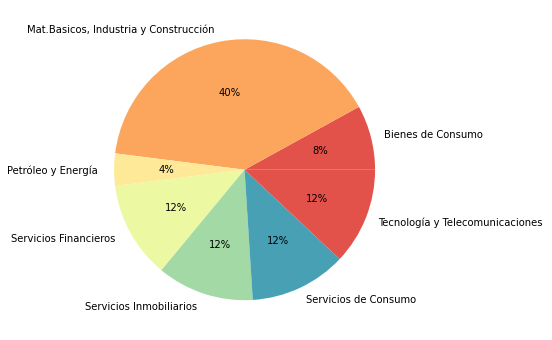

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(sector['total'], labels = sector['Sector'], colors = colors, autopct='%.0f%%')
plt.show()

## Nivell 3
### Exercici 3
Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 



In [1]:
from scrapy.item import Field
from scrapy.item import Item
from scrapy.spiders import Spider
from scrapy.selector import Selector
from scrapy.loader import ItemLoader
from scrapy.crawler import CrawlerRunner
from scrapy.crawler import CrawlerProcess
from crochet import setup, wait_for
import os


En l'exercici 3 he realitzat  una funció anomenada type_Autor_Song que pasat un autor i una cançó demanades al usuari
retorni la lletra de la cançó,el album, el escritor i l'any de publicació.La informació s'extreu a partir de un crawler que realitza un webscraping a la pagina azlyrics.
la meva primera idea es enmagatzemar la data extreta a un  objecte de la classe item, però al no utilitzar un projecte integrament per scrapy sino que es realitza dintre de un notebook hi han problemes de compatibilitat.
En principi  si l'usuari entra els noms mal escrits hauria de  tornar-los a demanar però  jupyternotebook fa saltar un error de refactor si  fa corre dues vegades el programa per tant només es pot fer corre una vegada d'altre forma s'ha de reinciar el kernel.

 

coses a millorar:
no he trobat la forma en la qual un cop introduit correctament el nom i la cançó no passi per el exept  i faci print de  tornar a escriure de nou els dos camps 

In [2]:
setup()
#@wait_for(10)
def Type_Author_Song(author,song):
    base_urls =['https://www.azlyrics.com/lyrics/{}/{}.html'.format(author.replace(" ", "").lower(),song.replace(" ", "").lower())]

    class LyricssSpider(Spider):
        name= 'MyOwnSpider'
        user_agent = ["Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1"]
        

        start_urls = base_urls
        def parse (self,response):
            
            sel = Selector(response)
            author = sel.xpath('normalize-space(/html/body/div[2]/div/div[2]/div[10]/small)').extract()
            title = sel.xpath('normalize-space(/html/body/div[2]/div/div[2]/b)').extract()
            song = sel.xpath('normalize-space(/html/body/div[2]/div/div[2]/div[5])').extract()
            album = sel.xpath('normalize-space(/html/body/div[2]/div/div[2]/div/div[1]/b)').extract()
            
            year = sel.xpath('//div[@class = "songinalbum_title"]/descendant::text()[3]').extract()
                                              
           
            print(author)
            print(title)
            print(album)
            print(year)
            print(song)
           
      
            

    try:
        
        process = CrawlerProcess()
        process.crawl(LyricssSpider)
        process.start()

    except:
        
        
        print('type another request or type it correctly')
        author = input('Type an author')
        song = input('Type a song')
        Type_Author_Song(author,song)
        
    
    
        
        
        



In [ ]:
author = input('Type an author(no aticles)')
song = input('Type a song ')
Type_Author_Song(author,song)


Type an author(no aticles)nirvana
Type a song the man who sold the world


2021-10-01 10:37:48 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-10-01 10:37:48 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2021-10-01 10:37:48 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-10-01 10:37:48 [scrapy.crawler] INFO: Overridden settings:
{}
2021-10-01 10:37:48 [scrapy.extensions.telnet] INFO: Telnet Password: 9357d36996ae50ae
2021-10-01 10:37:48 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2021-10-01 10:37:48 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 's

type another request or type it correctly


2021-10-01 10:37:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.azlyrics.com/lyrics/nirvana/themanwhosoldtheworld.html> (referer: None)
2021-10-01 10:37:49 [scrapy.core.engine] INFO: Closing spider (finished)
2021-10-01 10:37:49 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 332,
 'downloader/request_count': 1,
 'downloader/request_method_count/GET': 1,
 'downloader/response_bytes': 6418,
 'downloader/response_count': 1,
 'downloader/response_status_count/200': 1,
 'elapsed_time_seconds': 0.93839,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2021, 10, 1, 8, 37, 49, 725944),
 'httpcompression/response_bytes': 20386,
 'httpcompression/response_count': 1,
 'log_count/DEBUG': 1,
 'log_count/INFO': 10,
 'response_received_count': 1,
 'scheduler/dequeued': 1,
 'scheduler/dequeued/memory': 1,
 'scheduler/enqueued': 1,
 'scheduler/enqueued/memory': 1,
 'start_time': datetime.datetime(2021, 10, 1, 8, 37, 48, 787554)}
2021-10-0

['Writer(s): David Bowie']
['"The Man Who Sold The World"']
['"MTV Unplugged In New York"']
[' (1994)']
["We passed upon the stairs We spoke of was and when Although I wasn't there He said I was his friend Which came as a surprise I spoke into his eyes I thought you died alone A long long time ago Oh no, not me We never lost control You're face to face With the man who sold the world I laughed and shook his hand And made my way back home I searched for foreign land For years and years I roamed I gazed a gazely stare We walked a million hills I must have died alone A long, long time ago Who knows? Not me I never lost control You're face to face With the man who sold the world Who knows? Not me We never lost control You're face to face With the man who sold the world"]
